#### **Background for this Python-Polars project**

As my interests for Rust gradually grew and increased upward (not downward actually), I realised why so many people said it could be a hard programming language to learn. My head was spinning after reading the Rust programming language book and also watching a few Youtube videos about it. One likely reason could be that I didn't come from a computer science major. I've then decided to start from something I was more familiar with, which was Jupyter notebook or lab. Then somehow through various online ventures and surfing, I managed to start two projects in parallel. One was where I used Polars, a blazingly fast dataframe library that was written completely in Rust with a very light Python binding. This meant I could utilise it in Python or Rust, so I started with Python version first (obviously), which so far had been very pleasing and indeed fast as it claimed. This work was purely on small molecules downloaded from the ChEMBL database, and would be detailed in this portfolio blog post. 

I began with importing Polars dataframe library as shown below (note: installation needs to occur first prior to this step - detailed steps were available in its GitHub repo) - **add link**

In [1]:
# Update Polars version
# Uncomment the following line if needing to update Polars
#pip install --upgrade polars

In [2]:
import polars as pl

In [3]:
# Show version of Polars 
pl.show_versions()

---Version info---
Polars: 0.15.6
Index type: UInt32
Platform: macOS-10.15.7-x86_64-i386-64bit
Python: 3.10.8 (main, Oct 13 2022, 10:19:13) [Clang 12.0.0 (clang-1200.0.32.29)]
---Optional dependencies---
pyarrow: 10.0.1
pandas: 1.5.1
numpy: 1.23.4
fsspec: <not installed>
connectorx: <not installed>
xlsx2csv: 0.8
matplotlib: 3.6.2


Next step would be to access and download the compound dataset from ChEMBL database. So this was done and the file saved as .csv file, which was imported and read via read_csv() as shown below.

In [4]:
df = pl.read_csv("chembl_mols.csv")
df.head() #read first 5 rows
#df #read full dataset

"ChEMBL ID"";""Name"";""Synonyms"";""Type"";""Max Phase"";""Molecular Weight"";""Targets"";""Bioactivities"";""AlogP"";""Polar Surface Area"";""HBA"";""HBD"";""#RO5 Violations"";""#Rotatable Bonds"";""Passes Ro3"";""QED Weighted"";""CX Acidic pKa"";""CX Basic pKa"";""CX LogP"";""CX LogD"";""Aromatic Rings"";""Structure Type"";""Inorganic Flag"";""Heavy Atoms"";""HBA (Lipinski)"";""HBD (Lipinski)"";""#RO5 Violations (Lipinski)"";""Molecular Weight (Monoisotopic)"";""Molecular Species"";""Molecular Formula"";""Smiles"";""Inchi Key"
str
"""CHEMBL1206185;..."
"""CHEMBL539070;""..."
"""CHEMBL3335528;..."
"""CHEMBL2419030;..."
"""CHEMBL4301448;..."


#### **Data wrangling**

Now first problem appeared without surprises as this dataset was downloaded as .csv file, which meant it was likely to have a certain delimiter in between each variable. The dataset showed all data were packed as strings for each compound in each row. Each variable is separated or delimited by semicolons. To read the dataframe properly, I've added a delimiter term into the code to transform the dataframe into a more readable format.

In [5]:
# Going back to polars documentation, use "sep" to set the delimiter of the file
# which in this case is semicolon
df = pl.read_csv("chembl_mols.csv", sep = ";")
# Show the first 10 rows of data
#df.head(10)
df

ChEMBL ID,Name,Synonyms,Type,Max Phase,Molecular Weight,Targets,Bioactivities,AlogP,Polar Surface Area,HBA,HBD,#RO5 Violations,#Rotatable Bonds,Passes Ro3,QED Weighted,CX Acidic pKa,CX Basic pKa,CX LogP,CX LogD,Aromatic Rings,Structure Type,Inorganic Flag,Heavy Atoms,HBA (Lipinski),HBD (Lipinski),#RO5 Violations (Lipinski),Molecular Weight (Monoisotopic),Molecular Species,Molecular Formula,Smiles,Inchi Key
str,str,str,str,i64,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,i64,str,str,str,str,str,str,str,str,str
"""CHEMBL1206185""","""""","""""","""Small molecule...",0,"""607.88""","""""","""""","""9.46""","""89.62""","""5""","""2""","""2""","""17""","""N""","""0.09""","""-1.91""","""8.38""","""9.40""","""9.36""","""3""","""MOL""",-1,"""42""","""5""","""3""","""2""","""607.2790""","""ACID""","""C35H45NO4S2""","""CCCCCCCCCCC#CC...","""UFBLKYIDZFRLPR..."
"""CHEMBL539070""","""""","""""","""Small molecule...",0,"""286.79""","""1""","""1""","""2.28""","""73.06""","""6""","""2""","""0""","""5""","""N""","""0.63""","""13.84""","""3.64""","""2.57""","""2.57""","""2""","""MOL""",-1,"""17""","""5""","""3""","""0""","""250.0888""","""NEUTRAL""","""C11H15ClN4OS""","""CCCOc1ccccc1-c...","""WPEWNRKLKLNLSO..."
"""CHEMBL3335528""","""""","""""","""Small molecule...",0,"""842.80""","""2""","""6""","""0.18""","""269.57""","""18""","""5""","""2""","""17""","""N""","""0.09""","""3.20""","""None""","""3.31""","""-0.14""","""3""","""MOL""",-1,"""60""","""19""","""5""","""2""","""842.2633""","""ACID""","""C41H46O19""","""COC(=O)[C@H](O...","""KGUJQZWYZPYYRZ..."
"""CHEMBL2419030""","""""","""""","""Small molecule...",0,"""359.33""","""4""","""4""","""3.94""","""85.13""","""6""","""1""","""0""","""3""","""N""","""0.66""","""None""","""None""","""3.66""","""3.66""","""2""","""MOL""",-1,"""24""","""6""","""1""","""0""","""359.0551""","""NEUTRAL""","""C14H12F3N3O3S""","""O=c1nc(NC2CCCC...","""QGDMYSDFCXOKML..."
"""CHEMBL4301448""","""""","""""","""Small molecule...",0,"""465.55""","""""","""""","""5.09""","""105.28""","""6""","""4""","""1""","""10""","""N""","""0.15""","""None""","""12.14""","""4.41""","""2.00""","""4""","""MOL""",-1,"""33""","""7""","""5""","""1""","""465.1635""","""BASE""","""C24H24FN5O2S""","""N=C(N)NCCCOc1c...","""RXTJPHLPHOZLFS..."
"""CHEMBL3827271""","""""","""""","""Small molecule...",0,"""712.85""","""1""","""1""","""-2.84""","""319.06""","""10""","""11""","""2""","""16""","""N""","""0.07""","""4.08""","""10.49""","""-6.88""","""-8.95""","""0""","""MOL""",-1,"""50""","""19""","""14""","""3""","""712.4232""","""ZWITTERION""","""C31H56N10O9""","""CC(C)C[C@@H]1N...","""QJQNNLICZLLPMB..."
"""CHEMBL1969944""","""""","""""","""Small molecule...",0,"""""","""56""","""56""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""NONE""",-1,"""""","""""","""""","""""","""""","""""","""""","""""",""""""
"""CHEMBL3465961""","""""","""""","""Small molecule...",0,"""319.42""","""16""","""22""","""2.22""","""50.50""","""4""","""1""","""0""","""6""","""N""","""0.87""","""None""","""9.38""","""2.13""","""-0.44""","""1""","""MOL""",-1,"""23""","""4""","""1""","""0""","""319.2060""","""BASE""","""C18H26FN3O""","""CC(O)CN1CCC(CN...","""FZEVYCHTADTXPM..."
"""CHEMBL587495""","""""","""""","""Small molecule...",0,"""478.54""","""""","""""","""6.85""","""66.73""","""4""","""3""","""1""","""6""","""N""","""0.23""","""10.67""","""8.47""","""6.04""","""4.93""","""5""","""MOL""",-1,"""34""","""4""","""4""","""1""","""478.1439""","""NEUTRAL""","""C26H21F3N4S""","""Nc1cccc(CNCc2c...","""KZOHKPSNJBXTRJ..."


Initially, I only wanted to download about 24 compounds from ChEMBL database to trial first. Unknowingly, I ended up downloading the whole curated set of 2,331,700 small molecules (!), and I found this out when I loaded the dataframe after setting the delimiter for the csv file. Loading these 2,331,700 rows of data was fast, which occurred within a few seconds. This echoed many users' experiences with Polars, so I was quite impressed with Rust actually, as this was the core programming language used to write the dataframe library.

So now there was the full dataframe, I wanted to find out what types of physicochemical properties were there.

In [6]:
# Print all column names and data types to see what compound properties are stored in chEMBL database
print(df.glimpse())

Rows: 2331700
Columns: 32
$ ChEMBL ID                        <Utf8> CHEMBL1206185, CHEMBL539070, CHEMBL3335528, CHEMBL2419030, CHEMBL4301448, CHEMBL3827271, CHEMBL1969944, CHEMBL3465961, CHEMBL587495, CHEMBL3824158
$ Name                             <Utf8> , , , , , , , , ,                                             
$ Synonyms                         <Utf8> , , , , , , , , ,                                             
$ Type                             <Utf8> Small molecule, Small molecule, Small molecule, Small molecule, Small molecule, Small molecule, Small molecule, Small molecule, Small molecule, Small molecule
$ Max Phase                       <Int64> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0                                  
$ Molecular Weight                 <Utf8> 607.88, 286.79, 842.80, 359.33, 465.55, 712.85, , 319.42, 478.54, 422.48
$ Targets                          <Utf8> , 1, 2, 4, , 1, 56, 16, , 2                                   
$ Bioactivities                    <Utf8> , 1, 6,

A separate dataframe was saved as df_col_list to show all the column names used, which reflected the physicochemical properties of all the small molecules curated by ChEMBL database. There were a few I wasn't sure of so I went through the ChEMBL_31 schema documentation and ChEMBL database website to find out.

Selected definitions of the physicochemical properties of compounds were adapted from ChEMBL_31 schema documentation (available as "Release notes" on website), or if not available from the documentation, I resorted to interpret them myself by going into compounds randomly in that particular physicochemical category on ChEMBL database (e.g. bioactivities was not included in the documentation). 

The definitions for these properties were shown below:

'Max Phase' - Maximum phase of development reached for the compound (4 = approved). Null where max phase has not yet been assigned.

'Bioactivities' - Various biological assays used for the compounds e.g. IC50s, GI50s, potency tests etc.

'AlogP' - Calculated partition coefficient

'HBA' - Number of hydrogen bond acceptors

'HBD' - Number of hydrogen bond donors

'#RO5 Violations' - Number of violations of Lipinski's rule-of-five, using HBA and HBD definitions

'Passes Ro3' - Indicates whether the compound passes the rule-of-three (mw < 300, logP < 3 etc)

'QED Weighted' - Weighted quantitative estimate of drug likeness (as defined by Bickerton et al., Nature Chem 2012)

'Inorganic flag' - Indicates whether the molecule is inorganic (i.e., containing only metal atoms and <2 carbon atoms), where 1 = inorganic compound and -1 = not inorganic compound (assume 0 means it's neither case or yet to be assigned)

'Heavy Atoms' - Number of heavy (non-hydrogen) atoms

'CX Acidic pKa' - The most acidic pKa calculated using ChemAxon v17.29.0

'CX Basic pKa' - The most basic pKa calculated using ChemAxon v17.29.0
 
'CX LogP' - The calculated octanol/water partition coefficient using ChemAxon v17.29.0
 
'CX LogD' - The calculated octanol/water distribution coefficient at pH7.4 using ChemAxon v17.29.0

'Structure Type' - based on compound_structures table, where SEQ indicates an entry in the protein_therapeutics table instead, NONE indicates an entry in neither tables, e.g. structure unknown

'Inchi Key' - the IUPAC international chemical identifier key

Now, next step was also quite important, which was to check the data types for each column in the dataset.

So from what I could see, a lot of the columns were of data type "Utf8" (with only two columns that had "Int64"), which meant they were strings. However, a lot of these columns were actually storing numbers as integers or floats. So to make my life easier for this project, I then went on to convert these data types to the relevant ones for these columns.

In [7]:
# Convert data types for multiple selected columns
# Note: only takes two positional arguments, so needed to use the [] in code to change 
# multiple columns all at once (use alias if wanting to keep original data type in column, 
# as it adds the new column under an alias name to dataframe
df_new = df.with_columns(
    [
        (pl.col("Molecular Weight")).cast(pl.Float64, strict = False),
        (pl.col("Targets")).cast(pl.Int64, strict = False),
        (pl.col("Bioactivities")).cast(pl.Int64, strict = False),
        (pl.col("AlogP")).cast(pl.Float64, strict = False),
        (pl.col("Polar Surface Area")).cast(pl.Float64, strict = False),
        (pl.col("HBA")).cast(pl.Int64, strict = False),
        (pl.col("HBD")).cast(pl.Int64, strict = False),
        (pl.col("#RO5 Violations")).cast(pl.Int64, strict = False),
        (pl.col("#Rotatable Bonds")).cast(pl.Int64, strict = False),
        (pl.col("QED Weighted")).cast(pl.Float64, strict = False),
        (pl.col("CX Acidic pKa")).cast(pl.Float64, strict = False),
        (pl.col("CX Basic pKa")).cast(pl.Float64, strict = False),
        (pl.col("CX LogP")).cast(pl.Float64, strict = False),
        (pl.col("CX LogD")).cast(pl.Float64, strict = False),
        (pl.col("Aromatic Rings")).cast(pl.Int64, strict = False),
        (pl.col("Heavy Atoms")).cast(pl.Int64, strict = False),
        (pl.col("HBA (Lipinski)")).cast(pl.Int64, strict = False),
        (pl.col("HBD (Lipinski)")).cast(pl.Int64, strict = False),
        (pl.col("#RO5 Violations (Lipinski)")).cast(pl.Int64, strict = False),
        (pl.col("Molecular Weight (Monoisotopic)")).cast(pl.Float64, strict = False)
    ]
)
df_new.head()

ChEMBL ID,Name,Synonyms,Type,Max Phase,Molecular Weight,Targets,Bioactivities,AlogP,Polar Surface Area,HBA,HBD,#RO5 Violations,#Rotatable Bonds,Passes Ro3,QED Weighted,CX Acidic pKa,CX Basic pKa,CX LogP,CX LogD,Aromatic Rings,Structure Type,Inorganic Flag,Heavy Atoms,HBA (Lipinski),HBD (Lipinski),#RO5 Violations (Lipinski),Molecular Weight (Monoisotopic),Molecular Species,Molecular Formula,Smiles,Inchi Key
str,str,str,str,i64,f64,i64,i64,f64,f64,i64,i64,i64,i64,str,f64,f64,f64,f64,f64,i64,str,i64,i64,i64,i64,i64,f64,str,str,str,str
"""CHEMBL1206185""","""""","""""","""Small molecule...",0,607.88,null,null,9.46,89.62,5,2,2,17,"""N""",0.09,-1.91,8.38,9.4,9.36,3,"""MOL""",-1,42,5,3,2,607.279,"""ACID""","""C35H45NO4S2""","""CCCCCCCCCCC#CC...","""UFBLKYIDZFRLPR..."
"""CHEMBL539070""","""""","""""","""Small molecule...",0,286.79,1,1,2.28,73.06,6,2,0,5,"""N""",0.63,13.84,3.64,2.57,2.57,2,"""MOL""",-1,17,5,3,0,250.0888,"""NEUTRAL""","""C11H15ClN4OS""","""CCCOc1ccccc1-c...","""WPEWNRKLKLNLSO..."
"""CHEMBL3335528""","""""","""""","""Small molecule...",0,842.8,2,6,0.18,269.57,18,5,2,17,"""N""",0.09,3.2,null,3.31,-0.14,3,"""MOL""",-1,60,19,5,2,842.2633,"""ACID""","""C41H46O19""","""COC(=O)[C@H](O...","""KGUJQZWYZPYYRZ..."
"""CHEMBL2419030""","""""","""""","""Small molecule...",0,359.33,4,4,3.94,85.13,6,1,0,3,"""N""",0.66,null,null,3.66,3.66,2,"""MOL""",-1,24,6,1,0,359.0551,"""NEUTRAL""","""C14H12F3N3O3S""","""O=c1nc(NC2CCCC...","""QGDMYSDFCXOKML..."
"""CHEMBL4301448""","""""","""""","""Small molecule...",0,465.55,null,null,5.09,105.28,6,4,1,10,"""N""",0.15,null,12.14,4.41,2.0,4,"""MOL""",-1,33,7,5,1,465.1635,"""BASE""","""C24H24FN5O2S""","""N=C(N)NCCCOc1c...","""RXTJPHLPHOZLFS..."


Once all the columns' data types have been checked and converted to appropriate types accordingly, I used null_count() to see the distributions of all null entries in the dataset.

In [8]:
# Check for any null or NA or "" entries in the dataset
# Alternative line that works similarly is df.select(pl.all().null_count())
df_new.null_count()

ChEMBL ID,Name,Synonyms,Type,Max Phase,Molecular Weight,Targets,Bioactivities,AlogP,Polar Surface Area,HBA,HBD,#RO5 Violations,#Rotatable Bonds,Passes Ro3,QED Weighted,CX Acidic pKa,CX Basic pKa,CX LogP,CX LogD,Aromatic Rings,Structure Type,Inorganic Flag,Heavy Atoms,HBA (Lipinski),HBD (Lipinski),#RO5 Violations (Lipinski),Molecular Weight (Monoisotopic),Molecular Species,Molecular Formula,Smiles,Inchi Key
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,0,0,23249,96223,96223,83571,83571,83571,83571,83571,83571,0,83571,1052439,882168,83795,83795,83571,0,0,83571,83571,83571,83571,23252,0,0,0,0


In [9]:
# Drop rows with null entries
df_dn = df_new.drop_nulls()
df_dn 
# Number of rows reduced to 736,570

ChEMBL ID,Name,Synonyms,Type,Max Phase,Molecular Weight,Targets,Bioactivities,AlogP,Polar Surface Area,HBA,HBD,#RO5 Violations,#Rotatable Bonds,Passes Ro3,QED Weighted,CX Acidic pKa,CX Basic pKa,CX LogP,CX LogD,Aromatic Rings,Structure Type,Inorganic Flag,Heavy Atoms,HBA (Lipinski),HBD (Lipinski),#RO5 Violations (Lipinski),Molecular Weight (Monoisotopic),Molecular Species,Molecular Formula,Smiles,Inchi Key
str,str,str,str,i64,f64,i64,i64,f64,f64,i64,i64,i64,i64,str,f64,f64,f64,f64,f64,i64,str,i64,i64,i64,i64,i64,f64,str,str,str,str
"""CHEMBL539070""","""""","""""","""Small molecule...",0,286.79,1,1,2.28,73.06,6,2,0,5,"""N""",0.63,13.84,3.64,2.57,2.57,2,"""MOL""",-1,17,5,3,0,250.0888,"""NEUTRAL""","""C11H15ClN4OS""","""CCCOc1ccccc1-c...","""WPEWNRKLKLNLSO..."
"""CHEMBL3827271""","""""","""""","""Small molecule...",0,712.85,1,1,-2.84,319.06,10,11,2,16,"""N""",0.07,4.08,10.49,-6.88,-8.95,0,"""MOL""",-1,50,19,14,3,712.4232,"""ZWITTERION""","""C31H56N10O9""","""CC(C)C[C@@H]1N...","""QJQNNLICZLLPMB..."
"""CHEMBL3824158""","""""","""""","""Small molecule...",0,422.48,2,4,5.09,109.54,6,2,1,10,"""N""",0.31,4.59,7.99,2.49,2.42,2,"""MOL""",-1,31,7,2,1,422.1842,"""ACID""","""C24H26N2O5""","""CCCCCCCNC(C1=C...","""AXOVDUYYBUYLPC..."
"""CHEMBL1991010""","""""","""""","""Small molecule...",0,454.05,60,60,5.18,40.54,3,1,1,8,"""N""",0.6,13.88,8.48,6.34,5.22,2,"""MOL""",-1,31,3,1,1,417.2668,"""NEUTRAL""","""C28H36ClNO2""","""CCc1ccc(/C=C/C...","""XJDPAUYFONOZBC..."
"""CHEMBL195644""","""""","""""","""Small molecule...",0,375.47,2,3,4.95,70.42,4,2,0,2,"""N""",0.73,9.52,3.73,3.92,3.91,2,"""MOL""",-1,28,4,2,0,375.1834,"""NEUTRAL""","""C24H25NO3""","""C[C@]12CCC3c4c...","""MOBPUUUBXAHZBM..."
"""CHEMBL255263""","""""","""""","""Small molecule...",0,388.42,4,4,2.42,95.16,4,2,0,4,"""N""",0.72,11.24,1.02,1.74,1.74,3,"""MOL""",-1,27,7,2,0,388.1005,"""NEUTRAL""","""C18H17FN4O3S""","""O=C(Cc1ccc(F)c...","""JXSGQHRSUUOSAF..."
"""CHEMBL504846""","""""","""25-Deacetyl-Ri...","""Small molecule...",0,807.0,3,21,3.9,202.64,13,7,3,3,"""N""",0.23,8.61,8.27,3.4,2.87,1,"""MOL""",-1,58,14,7,3,806.4466,"""NEUTRAL""","""C44H62N4O10""","""CO[C@H]1/C=C/O...","""MVUYPJALSSDCQB..."
"""CHEMBL85010""","""""","""""","""Small molecule...",0,508.96,4,5,2.65,139.21,9,3,1,7,"""N""",0.22,7.03,2.71,3.27,2.75,1,"""MOL""",-1,35,10,3,1,508.1612,"""NEUTRAL""","""C24H29ClN2O8""","""CCOCCNC(=O)CO/...","""PHPBXALSGRFDIK..."
"""CHEMBL1364151""","""""","""""","""Small molecule...",0,314.39,5,6,2.5,54.56,4,1,0,3,"""N""",0.88,13.45,7.28,2.38,2.14,2,"""MOL""",-1,23,5,1,0,314.163,"""NEUTRAL""","""C18H22N2O3""","""Cc1[nH]c2ccccc...","""OKIWVYPITFJCJI..."


In [10]:
# Check that all rows with null values were dropped
df_dn.null_count()

ChEMBL ID,Name,Synonyms,Type,Max Phase,Molecular Weight,Targets,Bioactivities,AlogP,Polar Surface Area,HBA,HBD,#RO5 Violations,#Rotatable Bonds,Passes Ro3,QED Weighted,CX Acidic pKa,CX Basic pKa,CX LogP,CX LogD,Aromatic Rings,Structure Type,Inorganic Flag,Heavy Atoms,HBA (Lipinski),HBD (Lipinski),#RO5 Violations (Lipinski),Molecular Weight (Monoisotopic),Molecular Species,Molecular Formula,Smiles,Inchi Key
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [11]:
# To see summary statistics for df_dn dataset
df_dn.describe()

describe,ChEMBL ID,Name,Synonyms,Type,Max Phase,Molecular Weight,Targets,Bioactivities,AlogP,Polar Surface Area,HBA,HBD,#RO5 Violations,#Rotatable Bonds,Passes Ro3,QED Weighted,CX Acidic pKa,CX Basic pKa,CX LogP,CX LogD,Aromatic Rings,Structure Type,Inorganic Flag,Heavy Atoms,HBA (Lipinski),HBD (Lipinski),#RO5 Violations (Lipinski),Molecular Weight (Monoisotopic),Molecular Species,Molecular Formula,Smiles,Inchi Key
str,str,str,str,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,str,f64,f64,f64,f64,f64,f64,str,f64,f64,f64,f64,f64,f64,str,str,str,str
"""count""","""736570""","""736570""","""736570""","""736570""",736570.0,736570.0,736570.0,736570.0,736570.0,736570.0,736570.0,736570.0,736570.0,736570.0,"""736570""",736570.0,736570.0,736570.0,736570.0,736570.0,736570.0,"""736570""",736570.0,736570.0,736570.0,736570.0,736570.0,736570.0,"""736570""","""736570""","""736570""","""736570"""
"""null_count""","""0""","""0""","""0""","""0""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"""0""",0.0,0.0,0.0,0.0,0.0,0.0,"""0""",0.0,0.0,0.0,0.0,0.0,0.0,"""0""","""0""","""0""","""0"""
"""mean""",null,null,null,null,0.007937,431.880042,5.520715,8.705471,3.325204,97.58116,5.890221,2.274721,0.489124,6.216262,null,0.510936,9.59944,5.074377,2.815115,2.17363,2.754412,null,-0.929521,30.266113,7.276555,2.497847,0.576319,428.334452,null,null,null,null
"""std""",null,null,null,null,0.164565,135.637543,14.784793,55.537836,1.980414,47.40847,2.459106,1.681943,0.794171,3.894505,null,0.229039,3.583639,3.234099,2.286325,2.645694,1.2009,null,0.255953,9.54406,3.067158,2.081485,0.908719,133.755653,null,null,null,null
"""min""","""CHEMBL10""","""""","""""","""""",0.0,45.04,1.0,1.0,-12.92,3.24,1.0,0.0,0.0,0.0,"""N""",0.01,-20.03,0.0,-16.71,-26.04,0.0,"""BOTH""",-1.0,3.0,1.0,0.0,0.0,45.0215,"""ACID""","""C10H10Br2N2O""","""Br.Br.C/C(=N/N...","""AAAADVYFXUUVEO..."
"""max""","""CHEMBL99998""","""t-4-AMINOCROTO...","""trovafloxacin9...","""Unknown""",4.0,1901.51,1334.0,17911.0,16.83,595.22,32.0,25.0,4.0,59.0,"""Y""",0.95,14.0,38.8,18.31,18.31,28.0,"""MOL""",0.0,76.0,34.0,32.0,4.0,999.4063,"""ZWITTERION""","""HNNa2O8S2""","""n1nc2c([nH]1)c...","""ZZZZEJJXQQRZBH..."
"""median""",null,null,null,null,0.0,413.46,2.0,3.0,3.37,88.32,5.0,2.0,0.0,5.0,null,0.51,10.51,4.7,2.97,2.46,3.0,null,-1.0,29.0,7.0,2.0,0.0,410.2066,null,null,null,null


One of the columns that jumped out from the summary statistics of the df_dn dataset, was the "Targets" column. It ranged from 1 to 1334 targets. Out of curiosity, I went through several places on ChEMBL website to find out the exact definition of "Target". Eventually I settled on an answer which explained that the "Target" column represented the number of targets associated with the particular ChEMBL compound listed. I then singled out the ChEMBL compound with 1334 targets recorded, it turned out to be imatinib, which was marketed as Gleevec, and was a well-known prescription medicine for leukaemia and other selected oncological disorders with many well-documented drug interactions.

In [12]:
# This was confirmed via a filter function, which brought up CHEMBL1421, or also known as dasatinib
df_dn.filter(pl.col("Targets") == 1334)

ChEMBL ID,Name,Synonyms,Type,Max Phase,Molecular Weight,Targets,Bioactivities,AlogP,Polar Surface Area,HBA,HBD,#RO5 Violations,#Rotatable Bonds,Passes Ro3,QED Weighted,CX Acidic pKa,CX Basic pKa,CX LogP,CX LogD,Aromatic Rings,Structure Type,Inorganic Flag,Heavy Atoms,HBA (Lipinski),HBD (Lipinski),#RO5 Violations (Lipinski),Molecular Weight (Monoisotopic),Molecular Species,Molecular Formula,Smiles,Inchi Key
str,str,str,str,i64,f64,i64,i64,f64,f64,i64,i64,i64,i64,str,f64,f64,f64,f64,f64,i64,str,i64,i64,i64,i64,i64,f64,str,str,str,str
"""CHEMBL941""","""IMATINIB""","""GLAMOX|Gleevec...","""Small molecule...",4,493.62,1334,4359,4.59,86.28,7,2,0,7,"""N""",0.39,12.69,7.84,4.38,3.8,4,"""MOL""",0,37,8,2,0,493.259,"""NEUTRAL""","""C29H31N7O""","""Cc1ccc(NC(=O)c...","""KTUFNOKKBVMGRW..."


To explore other physicochemical and molecular properties in the dataframe, "Max Phase" was one of the first few that drew my interests. So it tagged each ChEMBL compound with a max phase number from 0 to 4, where 4 meant the compound was approved (usually also meant it was already a precription medicine). Thinking along this line, I thought what about those compounds that had max phase as 0, because they were the ones still pending to be assigned with a max phase number tag. So here I thought this might be a good time to introduce some machine learning model, to predict whether these 0 max phase compounds would enter the approved max phase.

Firstly, I had a look at the overall distribution of the max phase compounds in this dataframe df_dn.

In [13]:
# Interested in what types of "Max Phase" were recorded for the curated small molecules in ChEMBL database
df_dn.groupby("Max Phase", maintain_order = True).agg(pl.count())

Max Phase,count
i64,u32
0,734633
3,303
4,954
2,441
1,239


A quick groupby function showed that there were only 954 small molecules approved. Phase 3 recorded a total of 303 small molecules. For phase 2, there were 441 small molecules, followed by 239 compounds in phase 1. There were, however, a total amount of 734,633 small molecules that had zero or null as phase number, that were still pending for a max phase number (as per ChEMBL_31 schema documentation).

One of the other parameters I was interested in was "QED Weighted". So I went further into understanding what it meant, as the original reference was nicely provided in the ChEMBL_31 schema documentation. The reference paper was by [Bickerton, G., Paolini, G., Besnard, J. et al. Quantifying the chemical beauty of drugs. Nature Chem 4, 90–98 (2012)](https://doi.org/10.1038/nchem.1243)(note: author's manuscript is available to view via PubMed link, the Nature Chemistry link only provides abstract with access to article via other means as stated). In simple words, it was a measure of druglikeness for small molecules based on the concept of desirability, which is based on a total of 8 different molecular properties. These molecular properties included: molecular weight, ALogP, polar surface area, number of hydrogen bond acceptors, number of hydrogen bond donors, number of rotatable bonds, number of aromatic rings and structural alerts. Without going into too much details for this QED Weighted parameter, it is normally recorded as a number that ranges from 0 to 1, with 0 being the least druglike and 1 being the most druglike.

#### **Prepare dataframe prior to running ML model**

A rough plan at this stage was to filter out Max Phase 4 and 0 compounds. Max phase 0 compounds were the ones that were not assigned with any max phase numbers yet, so I thought this would be ideal to be used as part of the testing set. The idea was to use "Max Phase" parameter as the target y variable for a logistic regression model, because ultimately stakeholders would be most interested in which candidate compounds would have the most likely potentials to reach the approved stage during the drug discovery and development pipeline, with the smallest possible amount of resources and time needed, in order to provide the greatest public benefit. The goal of this ML model was to answer the question: which physicochemical parameters would be the most suitable ones to predict whether a compound will enter max phase 4 (approved) or not?

In [14]:
# To see full df_dn dataframe only
df_dn

ChEMBL ID,Name,Synonyms,Type,Max Phase,Molecular Weight,Targets,Bioactivities,AlogP,Polar Surface Area,HBA,HBD,#RO5 Violations,#Rotatable Bonds,Passes Ro3,QED Weighted,CX Acidic pKa,CX Basic pKa,CX LogP,CX LogD,Aromatic Rings,Structure Type,Inorganic Flag,Heavy Atoms,HBA (Lipinski),HBD (Lipinski),#RO5 Violations (Lipinski),Molecular Weight (Monoisotopic),Molecular Species,Molecular Formula,Smiles,Inchi Key
str,str,str,str,i64,f64,i64,i64,f64,f64,i64,i64,i64,i64,str,f64,f64,f64,f64,f64,i64,str,i64,i64,i64,i64,i64,f64,str,str,str,str
"""CHEMBL539070""","""""","""""","""Small molecule...",0,286.79,1,1,2.28,73.06,6,2,0,5,"""N""",0.63,13.84,3.64,2.57,2.57,2,"""MOL""",-1,17,5,3,0,250.0888,"""NEUTRAL""","""C11H15ClN4OS""","""CCCOc1ccccc1-c...","""WPEWNRKLKLNLSO..."
"""CHEMBL3827271""","""""","""""","""Small molecule...",0,712.85,1,1,-2.84,319.06,10,11,2,16,"""N""",0.07,4.08,10.49,-6.88,-8.95,0,"""MOL""",-1,50,19,14,3,712.4232,"""ZWITTERION""","""C31H56N10O9""","""CC(C)C[C@@H]1N...","""QJQNNLICZLLPMB..."
"""CHEMBL3824158""","""""","""""","""Small molecule...",0,422.48,2,4,5.09,109.54,6,2,1,10,"""N""",0.31,4.59,7.99,2.49,2.42,2,"""MOL""",-1,31,7,2,1,422.1842,"""ACID""","""C24H26N2O5""","""CCCCCCCNC(C1=C...","""AXOVDUYYBUYLPC..."
"""CHEMBL1991010""","""""","""""","""Small molecule...",0,454.05,60,60,5.18,40.54,3,1,1,8,"""N""",0.6,13.88,8.48,6.34,5.22,2,"""MOL""",-1,31,3,1,1,417.2668,"""NEUTRAL""","""C28H36ClNO2""","""CCc1ccc(/C=C/C...","""XJDPAUYFONOZBC..."
"""CHEMBL195644""","""""","""""","""Small molecule...",0,375.47,2,3,4.95,70.42,4,2,0,2,"""N""",0.73,9.52,3.73,3.92,3.91,2,"""MOL""",-1,28,4,2,0,375.1834,"""NEUTRAL""","""C24H25NO3""","""C[C@]12CCC3c4c...","""MOBPUUUBXAHZBM..."
"""CHEMBL255263""","""""","""""","""Small molecule...",0,388.42,4,4,2.42,95.16,4,2,0,4,"""N""",0.72,11.24,1.02,1.74,1.74,3,"""MOL""",-1,27,7,2,0,388.1005,"""NEUTRAL""","""C18H17FN4O3S""","""O=C(Cc1ccc(F)c...","""JXSGQHRSUUOSAF..."
"""CHEMBL504846""","""""","""25-Deacetyl-Ri...","""Small molecule...",0,807.0,3,21,3.9,202.64,13,7,3,3,"""N""",0.23,8.61,8.27,3.4,2.87,1,"""MOL""",-1,58,14,7,3,806.4466,"""NEUTRAL""","""C44H62N4O10""","""CO[C@H]1/C=C/O...","""MVUYPJALSSDCQB..."
"""CHEMBL85010""","""""","""""","""Small molecule...",0,508.96,4,5,2.65,139.21,9,3,1,7,"""N""",0.22,7.03,2.71,3.27,2.75,1,"""MOL""",-1,35,10,3,1,508.1612,"""NEUTRAL""","""C24H29ClN2O8""","""CCOCCNC(=O)CO/...","""PHPBXALSGRFDIK..."
"""CHEMBL1364151""","""""","""""","""Small molecule...",0,314.39,5,6,2.5,54.56,4,1,0,3,"""N""",0.88,13.45,7.28,2.38,2.14,2,"""MOL""",-1,23,5,1,0,314.163,"""NEUTRAL""","""C18H22N2O3""","""Cc1[nH]c2ccccc...","""OKIWVYPITFJCJI..."


Narrow down df_dn dataset to fulfill the following criteria:
* only small molecule type
* max phase of 0 and 4

The reason behind choosing only small molecules that had max phase of 0 and 4 was that a confusion matrix can be built in the end to see if the parameters selected would give us a reasonably good model to predict whether the next small molecule would enter into the approved or max phase of development. For now, I've chosen the following columns (by using the select() method) to appear in this interim df_f dataset.

In [15]:
df_0 = df_dn.filter(
    (pl.col("Type") == "Small molecule") &
    ((pl.col("Max Phase") == 0))
).select(["ChEMBL ID", 
          "Type", 
          "Max Phase",
          "#RO5 Violations", 
          "QED Weighted", 
          "CX LogP", 
          "CX LogD", 
          "Heavy Atoms"]
        )
df_0

ChEMBL ID,Type,Max Phase,#RO5 Violations,QED Weighted,CX LogP,CX LogD,Heavy Atoms
str,str,i64,i64,f64,f64,f64,i64
"""CHEMBL539070""","""Small molecule...",0,0,0.63,2.57,2.57,17
"""CHEMBL3827271""","""Small molecule...",0,2,0.07,-6.88,-8.95,50
"""CHEMBL3824158""","""Small molecule...",0,1,0.31,2.49,2.42,31
"""CHEMBL1991010""","""Small molecule...",0,1,0.6,6.34,5.22,31
"""CHEMBL195644""","""Small molecule...",0,0,0.73,3.92,3.91,28
"""CHEMBL255263""","""Small molecule...",0,0,0.72,1.74,1.74,27
"""CHEMBL504846""","""Small molecule...",0,3,0.23,3.4,2.87,58
"""CHEMBL85010""","""Small molecule...",0,1,0.22,3.27,2.75,35
"""CHEMBL1364151""","""Small molecule...",0,0,0.88,2.38,2.14,23


In [16]:
df_4 = df_dn.filter(
    (pl.col("Type") == "Small molecule") &
    (pl.col("Max Phase") == 4)
).select(["ChEMBL ID", 
          "Type", 
          "Max Phase",
          "#RO5 Violations", 
          "QED Weighted", 
          "CX LogP", 
          "CX LogD", 
          "Heavy Atoms"]
        )
df_4

ChEMBL ID,Type,Max Phase,#RO5 Violations,QED Weighted,CX LogP,CX LogD,Heavy Atoms
str,str,i64,i64,f64,f64,f64,i64
"""CHEMBL1096882""","""Small molecule...",4,0,0.31,-1.97,-5.12,24
"""CHEMBL2023898""","""Small molecule...",4,2,0.14,4.18,4.16,54
"""CHEMBL1029""","""Small molecule...",4,0,0.46,-1.18,-2.3,15
"""CHEMBL1616""","""Small molecule...",4,0,0.72,2.88,2.58,20
"""CHEMBL2146123""","""Small molecule...",4,1,0.33,-3.51,-3.81,32
"""CHEMBL1200773""","""Small molecule...",4,0,0.75,1.88,1.0,14
"""CHEMBL1201002""","""Small molecule...",4,0,0.77,1.42,-0.89,21
"""CHEMBL1086440""","""Small molecule...",4,1,0.58,5.88,5.88,21
"""CHEMBL2359966""","""Small molecule...",4,0,0.88,2.51,0.86,24


In [17]:
# Because of the large number of Max Phase 0 compounds
# Sample about 500 from this group, so that there are similar amount of data in each group
df_s_0 = df_0.sample(n = 950, shuffle = True, seed = 0)
df_s_0

ChEMBL ID,Type,Max Phase,#RO5 Violations,QED Weighted,CX LogP,CX LogD,Heavy Atoms
str,str,i64,i64,f64,f64,f64,i64
"""CHEMBL3448290""","""Small molecule...",0,0,0.91,2.05,0.62,21
"""CHEMBL3966308""","""Small molecule...",0,2,0.16,1.51,-0.41,48
"""CHEMBL3963545""","""Small molecule...",0,2,0.2,5.05,3.27,46
"""CHEMBL1649629""","""Small molecule...",0,0,0.53,3.21,3.21,24
"""CHEMBL3813954""","""Small molecule...",0,1,0.14,2.8,2.8,37
"""CHEMBL1164717""","""Small molecule...",0,0,0.42,1.6,1.55,35
"""CHEMBL1824896""","""Small molecule...",0,0,0.58,4.69,4.13,34
"""CHEMBL2323807""","""Small molecule...",0,0,0.88,3.09,2.22,20
"""CHEMBL3919258""","""Small molecule...",0,0,0.5,1.36,1.36,32


In [18]:
# Plan is to use logistic regression method for ML model, so the y variable I'm interested in
# here is whether a small molecule will be approved or not so it's going to be a binary 
# categorical variable - means it needs to be 0 (not approved) or 1 (approved)
# To do this, add a new column with a new name of "Max_Phase" & replace "4" as "1" (by dividing
# by 4 to reach this new label)
df_4_f = df_4.with_columns((pl.col("Max Phase") / 4).alias("Max_Phase"))
df_4_f

ChEMBL ID,Type,Max Phase,#RO5 Violations,QED Weighted,CX LogP,CX LogD,Heavy Atoms,Max_Phase
str,str,i64,i64,f64,f64,f64,i64,f64
"""CHEMBL1096882""","""Small molecule...",4,0,0.31,-1.97,-5.12,24,1.0
"""CHEMBL2023898""","""Small molecule...",4,2,0.14,4.18,4.16,54,1.0
"""CHEMBL1029""","""Small molecule...",4,0,0.46,-1.18,-2.3,15,1.0
"""CHEMBL1616""","""Small molecule...",4,0,0.72,2.88,2.58,20,1.0
"""CHEMBL2146123""","""Small molecule...",4,1,0.33,-3.51,-3.81,32,1.0
"""CHEMBL1200773""","""Small molecule...",4,0,0.75,1.88,1.0,14,1.0
"""CHEMBL1201002""","""Small molecule...",4,0,0.77,1.42,-0.89,21,1.0
"""CHEMBL1086440""","""Small molecule...",4,1,0.58,5.88,5.88,21,1.0
"""CHEMBL2359966""","""Small molecule...",4,0,0.88,2.51,0.86,24,1.0


In [19]:
# Change the data type of "Max_Phase" from float to integer
# So that the two different dataframes can be concatenated
df_4_f = df_4_f.with_column((pl.col("Max_Phase")).cast(pl.Int64, strict = False))
df_4_f

ChEMBL ID,Type,Max Phase,#RO5 Violations,QED Weighted,CX LogP,CX LogD,Heavy Atoms,Max_Phase
str,str,i64,i64,f64,f64,f64,i64,i64
"""CHEMBL1096882""","""Small molecule...",4,0,0.31,-1.97,-5.12,24,1
"""CHEMBL2023898""","""Small molecule...",4,2,0.14,4.18,4.16,54,1
"""CHEMBL1029""","""Small molecule...",4,0,0.46,-1.18,-2.3,15,1
"""CHEMBL1616""","""Small molecule...",4,0,0.72,2.88,2.58,20,1
"""CHEMBL2146123""","""Small molecule...",4,1,0.33,-3.51,-3.81,32,1
"""CHEMBL1200773""","""Small molecule...",4,0,0.75,1.88,1.0,14,1
"""CHEMBL1201002""","""Small molecule...",4,0,0.77,1.42,-0.89,21,1
"""CHEMBL1086440""","""Small molecule...",4,1,0.58,5.88,5.88,21,1
"""CHEMBL2359966""","""Small molecule...",4,0,0.88,2.51,0.86,24,1


In [20]:
# Also create a new column with the same name of "Max_Phase"
# So that the dataframes can be combined
df_s_0_f = df_s_0.with_column((pl.col("Max Phase")).alias("Max_Phase"))
df_s_0_f

ChEMBL ID,Type,Max Phase,#RO5 Violations,QED Weighted,CX LogP,CX LogD,Heavy Atoms,Max_Phase
str,str,i64,i64,f64,f64,f64,i64,i64
"""CHEMBL3448290""","""Small molecule...",0,0,0.91,2.05,0.62,21,0
"""CHEMBL3966308""","""Small molecule...",0,2,0.16,1.51,-0.41,48,0
"""CHEMBL3963545""","""Small molecule...",0,2,0.2,5.05,3.27,46,0
"""CHEMBL1649629""","""Small molecule...",0,0,0.53,3.21,3.21,24,0
"""CHEMBL3813954""","""Small molecule...",0,1,0.14,2.8,2.8,37,0
"""CHEMBL1164717""","""Small molecule...",0,0,0.42,1.6,1.55,35,0
"""CHEMBL1824896""","""Small molecule...",0,0,0.58,4.69,4.13,34,0
"""CHEMBL2323807""","""Small molecule...",0,0,0.88,3.09,2.22,20,0
"""CHEMBL3919258""","""Small molecule...",0,0,0.5,1.36,1.36,32,0


In [21]:
# Combine df_s_0_f (dataframe with max phase 0 compounds) & df_4_f (df with max phase 4 compounds)
df_concat = pl.concat([df_s_0_f, df_4_f], how = "vertical",)
print(df_concat)

shape: (1894, 9)
┌───────────┬───────────┬───────────┬────────────┬─────┬─────────┬─────────┬───────────┬───────────┐
│ ChEMBL ID ┆ Type      ┆ Max Phase ┆ #RO5       ┆ ... ┆ CX LogP ┆ CX LogD ┆ Heavy     ┆ Max_Phase │
│ ---       ┆ ---       ┆ ---       ┆ Violations ┆     ┆ ---     ┆ ---     ┆ Atoms     ┆ ---       │
│ str       ┆ str       ┆ i64       ┆ ---        ┆     ┆ f64     ┆ f64     ┆ ---       ┆ i64       │
│           ┆           ┆           ┆ i64        ┆     ┆         ┆         ┆ i64       ┆           │
╞═══════════╪═══════════╪═══════════╪════════════╪═════╪═════════╪═════════╪═══════════╪═══════════╡
│ CHEMBL344 ┆ Small     ┆ 0         ┆ 0          ┆ ... ┆ 2.05    ┆ 0.62    ┆ 21        ┆ 0         │
│ 8290      ┆ molecule  ┆           ┆            ┆     ┆         ┆         ┆           ┆           │
├╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌┤
│ CHEMBL396 ┆ Small     ┆ 0         ┆ 2          ┆ ... ┆ 1.51    ┆ -0.41  

In [22]:
# Check this df_concat dataset has all compounds in Max Phase 0 & 4 only
# Note Max Phase 4 (approved) compounds were re-labelled as Max_Phase = 1 
df_concat.groupby("Max_Phase").count()

Max_Phase,count
i64,u32
0,950
1,944


In [23]:
# Check df_concat dataset only has small molecules
df_concat.groupby("Type").count()

Type,count
str,u32
"""Small molecule...",1894


In [24]:
# Final version of dataset before entering ML phase 
# Leave out ChEMBL ID and Type
df_ml = df_concat.select(["Max_Phase", 
                          "#RO5 Violations", 
                          "QED Weighted", 
                          "CX LogP", 
                          "CX LogD", 
                          "Heavy Atoms"]
                        )
df_ml

Max_Phase,#RO5 Violations,QED Weighted,CX LogP,CX LogD,Heavy Atoms
i64,i64,f64,f64,f64,i64
0,0,0.91,2.05,0.62,21
0,2,0.16,1.51,-0.41,48
0,2,0.2,5.05,3.27,46
0,0,0.53,3.21,3.21,24
0,1,0.14,2.8,2.8,37
0,0,0.42,1.6,1.55,35
0,0,0.58,4.69,4.13,34
0,0,0.88,3.09,2.22,20
0,0,0.5,1.36,1.36,32


In [25]:
df_ml.null_count()

Max_Phase,#RO5 Violations,QED Weighted,CX LogP,CX LogD,Heavy Atoms
u32,u32,u32,u32,u32,u32
0,0,0,0,0,0


In [26]:
# Check data types in df_ml dataset
# Needs to be integers or floats for scikit-learn algorithms to work
df_ml.dtypes

[polars.datatypes.Int64,
 polars.datatypes.Int64,
 polars.datatypes.Float64,
 polars.datatypes.Float64,
 polars.datatypes.Float64,
 polars.datatypes.Int64]

#### **Import libraries for ML**

In [27]:
# Install scikit-learn - an open-source ML library
# Uncomment the line below if needing to install this library
#!pip install -U scikit-learn

In [28]:
# Import scikit-learn
import sklearn

# Check scikit-learn version
print(sklearn.__version__)

1.2.0


In [29]:
# Import other libraries needed to generate ML model (in this case - logistic regression)
# To use NumPy arrays to prepare X & y variables
import numpy as np
# Needed for dataframe to be used in scikit-learn ML
import pandas as pd
# To normalise dataset prior to running ML
from sklearn import preprocessing
# To split dataset into training & testing sets
from sklearn.model_selection import train_test_split
# To show data viz/graphs in Jupyter notebook
%matplotlib inline
# Import matplotlib/pyplot for data viz
import matplotlib.pyplot as plt

In [30]:
# Install pyarrow to convert Polars dataframe into Pandas dataframe (needed to run scikit-Learn)
!pip install pyarrow

In [31]:
# Convert Polars df to Pandas df so that scikit-learn can be used for ML
df_ml_pd = df_ml.to_pandas()
type(df_ml_pd)

pandas.core.frame.DataFrame

#### **Logistic regression with *scikit-learn***


In [32]:
# Define X variables from df_ml_pd dataset
X = np.asarray(df_ml_pd[["#RO5 Violations", 
                         "QED Weighted", 
                         "CX LogP", 
                         "CX LogD", 
                         "Heavy Atoms"]]
              )
X[0:5]

array([[ 0.  ,  0.91,  2.05,  0.62, 21.  ],
       [ 2.  ,  0.16,  1.51, -0.41, 48.  ],
       [ 2.  ,  0.2 ,  5.05,  3.27, 46.  ],
       [ 0.  ,  0.53,  3.21,  3.21, 24.  ],
       [ 1.  ,  0.14,  2.8 ,  2.8 , 37.  ]])

In [33]:
# Define y variable - note to use "Max_Phase", not the original "Max Phase"
y = np.asarray(df_ml_pd["Max_Phase"])
y[0:5]

array([0, 0, 0, 0, 0])

In [34]:
# Split dataset into trainging & testing sets
rng = np.random.RandomState(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = rng)
print('Training set:', X_train.shape, y_train.shape)
print('Testing set:', X_test.shape, y_test.shape)

Training set: (1515, 5) (1515,)
Testing set: (379, 5) (379,)


In [35]:
# Normalise & clean the dataset
# Fit on the training set (not on testing set as this may lead to data leakage)
# Transform on the testing set
X = preprocessing.StandardScaler().fit(X_train).transform(X_test)
X[0:5]

array([[-0.61683613,  0.76594864,  0.29675851,  0.52596937, -0.79684902],
       [ 0.61602236,  0.45724627,  1.96615599,  1.92002856, -0.11325544],
       [ 1.84888085, -1.43906824, -2.1393532 , -3.75082759,  0.37502569],
       [ 0.61602236, -0.73346284, -2.1166917 , -1.56196543,  0.27736946],
       [-0.61683613, -0.07195778, -1.5954771 , -1.05417464, -0.99216147]])

In [36]:
# Import logistic regression 
from sklearn.linear_model import LogisticRegression
# Create an instance of logistic regression classifier and fit the data
LogR = LogisticRegression().fit(X_train, y_train)
LogR

LogisticRegression()

In [37]:
y_mp = LogR.predict(X_test)
y_mp

array([0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,

In [38]:
# Convert the predicted values (in terms of log odds) into a dataframe
# Then use describe() method to get characteristics of the distribution
pred = pd.DataFrame(LogR.predict_log_proba(X))
pred.describe()

,0,1
count,379.000000,379.000000
mean,-0.834407,-0.674677
std,0.383863,0.332967
min,-1.818149,-2.239351
25%,-1.058584,-0.887024
50%,-0.779455,-0.613700
75%,-0.530824,-0.426098
max,-0.112640,-0.177126


In [39]:
# Or a quicker way to get the predicted probabilities is via predict_proba() method
y_mp_proba = LogR.predict_proba(X_test)
# Uncomment below to see the predicted probabilities printed
#print(y_mp_proba)

In [40]:
# Convert predicted probabilities into a dataframe
# then use describe() to show distributions
y_mp_prob = pd.DataFrame(y_mp_proba)
y_mp_prob.describe()

,0,1
count,379.000000,379.000000
mean,0.496784,0.503216
std,0.174218,0.174218
min,0.004315,0.143818
25%,0.382057,0.375627
50%,0.517089,0.482911
75%,0.624373,0.617943
max,0.856182,0.995685


In [41]:
# Note: for imbalanced dataset, accuracy score may not be very informative, use other metrics
# to evaluate or use other strategies to compensate for it
from sklearn.metrics import accuracy_score
accuracy_score(y_mp, y_test)

0.7018469656992085

##### **Pipeline method for logistic regression**

In [42]:
# Test pipline from scikit-Learn
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

LR = make_pipeline(StandardScaler(), LogisticRegression())
LR.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [43]:
LR.score(X_test, y_test)

0.6965699208443272

#### **Evaluation of the logistic regression model**

##### **Jaccard score**

In [44]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, y_mp, pos_label = 0)

0.549800796812749

##### **Confusion matrix**

In [45]:
# Import classification report & confusion matrix from scikit-learn library
from sklearn.metrics import confusion_matrix
# Import itertools - functions to create iterators for efficient looping
import itertools

# Function to plot confusion matrix
# cm = confusion matrix
# classes = 0 or 1 (no success/max phase 0-3 or success/max phase 4)
def plot_confusion_matrix(# Sets a cm object
                          cm, 
                          # Sets classes of '1s' (Successes) & '0s' (Non-successes) for the cm
                          classes,
                          # If setting normalize = true, reports in ratios instead of counts
                          normalize,
                          title = 'Confusion matrix',
                          # Choose colour of the cm (colourmap recognised by matplotlib)
                          cmap = plt.cm.Reds):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize = True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    # Plot the confusion matrix 
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)

    # Sets the decimal places of ratios if using normalize = True
    fmt = '.2f' if normalize else 'd'
    # Sets threshold for normalised results (ratios)
    thresh = cm.max() / 2.
    # Iterate through the ratios and differentiate between the text colours 
    # by using the threshold cut-off
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment = "center",
                 color = "white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
print(confusion_matrix(y_test, y_mp, labels = [1,0]))

[[128  62]
 [ 51 138]]


Confusion matrix, without normalization
[[128  62]
 [ 51 138]]


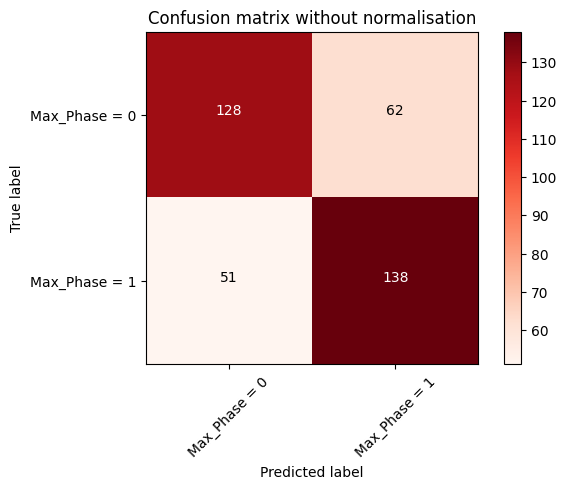

In [46]:
# Compute confusion matrix
matrix = confusion_matrix(y_test, y_mp, labels = [1,0])
np.set_printoptions(precision = 2)

# Plot confusion matrix without normalisation
plt.figure()
plot_confusion_matrix(matrix, 
                      classes = ['Max_Phase = 0','Max_Phase = 1'], 
                      normalize = False, 
                      title = "Confusion matrix without normalisation"
                     )

In [47]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_mp))

              precision    recall  f1-score   support

           0       0.69      0.73      0.71       189
           1       0.72      0.67      0.69       190

    accuracy                           0.70       379
   macro avg       0.70      0.70      0.70       379
weighted avg       0.70      0.70      0.70       379



In [48]:
# Log loss
# The further the predicted probability is from the actual/true value, the larger the log loss
# Ideally, the smaller the log loss the better the model will be
# Gauge how good the log regression model is at figuring out whether the parameters
# used are good to predict if a small molecule will be approved or not
from sklearn.metrics import log_loss
log_loss(y_test, y_mp_proba)

0.6149705820831467

**Distributions of features in the df_dn dataset**

In [49]:
# Check the types of compounds in the database
df_dn.groupby("Type").agg(pl.count())

Type,count
str,u32
"""Oligosaccharid...",2
"""Protein""",6756
"""Unclassified""",2
"""""",115084
"""Small molecule...",614702
"""Unknown""",24


In [50]:
# Viz - bar graphs for each category

In [51]:
df_dn.groupby("Molecular Species").agg(pl.count())

Molecular Species,count
str,u32
"""NEUTRAL""",490662
"""ACID""",105190
"""BASE""",102735
"""ZWITTERION""",37983


In [52]:
df_dn.groupby("Structure Type").agg(pl.count())

Structure Type,count
str,u32
"""MOL""",729834
"""BOTH""",6736


In [53]:
df_dn.groupby("Inorganic Flag", maintain_order = True).agg(pl.count())

Inorganic Flag,count
i64,u32
-1,684657
0,51913
